In [1]:
import numpy
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

/home/stepan/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### Данные:
Будем работать с датасетом [The Iris Dataset](http://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html).

In [2]:
from sklearn.datasets import load_iris

In [3]:
data = load_iris()

In [4]:
X, y = data['data'], data['target']

In [5]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y)
encoded_y = encoder.transform(y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_y)

### Задание:
Будем решать задачу классификации на 3 класса. В качестве модели используется нейронная сеть с одним скрытым слоем. Ваша задача оценить качество решенения задачи классификации по метрике `accuracy` в зависимости от числа нейронов скрытого слоя. Также оцените дисперсию функции качества в зависимости от числа главных компонент.

Нарисуйте график зависимости функции качества и ее дисперсии от числа нейронов скрытого слоя.

In [6]:
def baseline_model(neurons_number):
    """
    creating model of neural network with input layer (4 input neurons), 
    hidden layer with neurons_number number of neurons and output layer of 3 neurons
    
    Parameters
    ----------
    neurons_number : int
        number of neurons in the hidden layer
    """
    # create model
    model = Sequential()
    model.add(Dense(neurons_number, input_dim=4, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [8]:
#splitting data for cross validation
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

In [10]:
#calculating accuracy score and standard deviation score for number of neurons in the hidden layer from 2 to 19
import numpy as np
#accuracy score for each number of neurons is stored in accuracy
accuracy = np.array([])
#standard deviation score for each number of neurons is stored in std
std = np.array([])
number_of_neurons = np.arange(2, 20, 1)
for i in range(number_of_neurons[0], number_of_neurons[-1] + 1):
    print(i)
    estimator = KerasClassifier(build_fn=baseline_model, neurons_number=i, epochs=200, batch_size=5, verbose=0)
    results = cross_val_score(estimator, X, dummy_y, cv=kfold)
    accuracy = np.append(accuracy, results.mean() * 100)
    std = np.append(std, results.std() * 100)

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [38]:
#saving accuracy and std 
import pickle 
data = accuracy, std
with open('irisclassification.pickle', 'wb') as f:
    pickle.dump(data, f)

with open('irisclassification.pickle', 'rb') as f:
    accuracy, std = pickle.load(f)

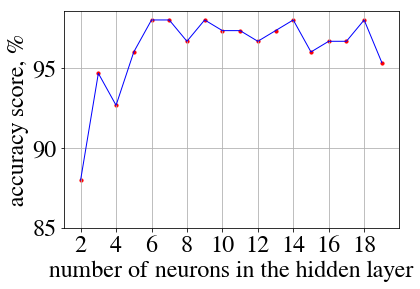

In [39]:
#configuring plot
from matplotlib import pylab as plt
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'FreeSerif'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 12
plt.rcParams['xtick.labelsize'] = 24
plt.rcParams['ytick.labelsize'] = 24
plt.rcParams['legend.fontsize'] = 24
plt.rcParams['axes.titlesize'] = 36
plt.rcParams['axes.labelsize'] = 24
#plotting a graph of the dependence of the accuracy score on the number of neurons in the hidden layer
plt.plot(number_of_neurons, accuracy, lw=1, c='b')
plt.scatter(number_of_neurons, accuracy, s=10, c='r')
plt.yticks(np.arange(85, 100, step=5))
plt.xticks(np.arange(2, 20, step=2))
plt.grid()
plt.ylabel('accuracy score, %')
plt.xlabel('number of neurons in the hidden layer')
plt.savefig('accuracy.png', bbox_inches='tight', dpi=600) 
plt.show()

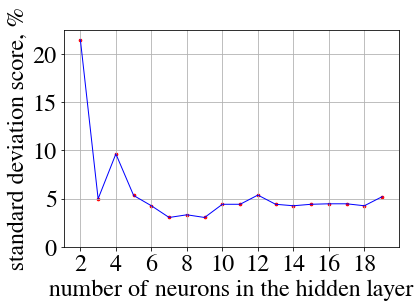

In [40]:
#plotting a graph of the dependence of the standard deviation score on the number of neurons in the hidden layer
plt.plot(number_of_neurons, std, lw=1, c='b')
plt.scatter(number_of_neurons, std, s=7, c='r')
plt.yticks(np.arange(0, 25, step=5))
plt.xticks(np.arange(2, 20, step=2))
plt.grid()
plt.ylabel('standard deviation score, %')
plt.xlabel('number of neurons in the hidden layer')
plt.savefig('std.png', bbox_inches='tight', dpi=600) 
plt.show()